In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


In [2]:
df= pd.read_csv("email.csv")

In [3]:
df.tail()

,Category,Message
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name
5572,"{""mode"":""full""",isActive:false}


In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.sample(7)

,Category,Message
1677,ham,"Yeah, that's fine! It's £6 to get in, is that ok?"
2527,ham,Do u noe how 2 send files between 2 computers?
34,spam,Thanks for your subscription to Ringtone UK yo...
1185,ham,"Yo, you around? Just got my car back"
824,spam,25p 4 alfie Moon's Children in need song on ur...
3304,ham,"It'll be tough, but I'll do what I have to"
2826,spam,Congratulations - Thanks to a good friend U ha...


In [6]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
df.dropna()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])

In [9]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()

# Fit and transform the Message column
x = vectorizer.fit_transform(df['Message'])


print(x.shape)

(5573, 8711)


In [11]:

y = df['Category']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=20,random_state=40)

In [14]:
model = MultinomialNB()

In [15]:
model.fit(x_train, y_train)

MultinomialNB()

In [16]:
y_pred=model.predict(x_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
mse=mean_squared_error(y_test,y_pred)


In [19]:
print(mse)

0.0


In [20]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

In [21]:
classification=classification_report(y_pred, y_test)
print(classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



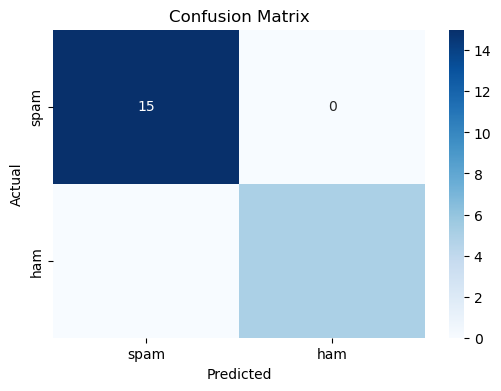

In [24]:
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['spam', 'ham'], yticklabels=['spam', 'ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()